In [27]:
from csv import DictReader
import numpy as np
#Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary

podatki = []
dtype = [
    ('Date', 'U10'),           # Date as string
    ('Time', 'U10'),            # Time as string
    ('Location', 'U100'),       # Location as string
    ('Operator', 'U100'),       # Operator as string
    ('Flight', 'U100'),         # Flight number as string
    ('Route', 'U100'),          # Route as string
    ('Type', 'U100'),           # Aircraft type as string
    ('Registration', 'U100'),   # Registration as string
    ('cn_In', 'U100'),          # Construction number or other identifier as string
    ('Aboard', np.int32),           # Number of people aboard as integer
    ('Fatalities', np.int32),       # Number of fatalities as integer
    ('Ground', np.int32),           # Number of ground fatalities as integer
    ('Summary', 'U1000')        # Summary as string
]

with open("podatki\Airplane_Crashes_and_Fatalities_Since_1908.csv", 'r', encoding='utf-8') as file:
    csv_reader = DictReader(file)
    for row in csv_reader:
        date = row['Date']
        time = row['Time']
        location = row['Location']
        operator = row['Operator']
        flightNr = row['Flight #']
        route = row['Route']
        type = row['Type']
        registration = row['Registration']
        CnIn = row['cn/In']
        aboard = int(row["Aboard"]) if row["Aboard"] else 0
        fatalities = int(row["Fatalities"]) if row["Fatalities"] else 0
        ground = int(row['Ground']) if row["Ground"] else 0
        summary = row['Summary']
        podatki.append((date,time,location,operator,flightNr,route,type,registration,CnIn,aboard,fatalities,ground,summary))
podatki = np.sort(np.array(podatki,dtype=dtype), order='Date')
print(podatki)



[('01/01/1966', '', 'Near Palembang, Sumarta, Indonesia', 'Garuda  Indonesia Airlines / Garuda Indonesia Airlines', '', '', 'Douglas DC-3 / Douglas DC-3', 'PK-GDU/PK-GDE', '13463 / 19719', 34, 34, 0, 'Midair collision between two Garuda aircraft. Both crashed into a swamp while approaching Palembang. Seventeen died on each aircraft.')
 ('01/01/1970', '00:30', 'Nulato, Alaska', 'Galena Air Service - Air Taxi', '', 'Nulato, AK - Tanana, AK', 'Cessna 180', 'N3472Y', '',  4,  2, 0, 'Emergency flight to airlift sick patient. Collided with trees while en route. Pilot stayed low to maintain ground contact at night. Continued VFR flight into adverse weather conditions.')
 ('01/01/1974', '12:38', 'Near Turin, Italy', 'Itavia', '', 'Bologna - Torino', 'Fokker F-28 Fellowship 1000', 'I-TIDE', '11015', 42, 38, 0, 'Crashed 2 miles short of the runway during an approach in fog and heavy rain.')
 ...
 ('12/31/1981', '20:00', 'Durango, Colorado', 'Sun West Airline - Air Taxi', '', 'Albuquerque, NM - D

In [ ]:
#Katera leta so bila najbolj nesrečna za potnike letalskega prometa

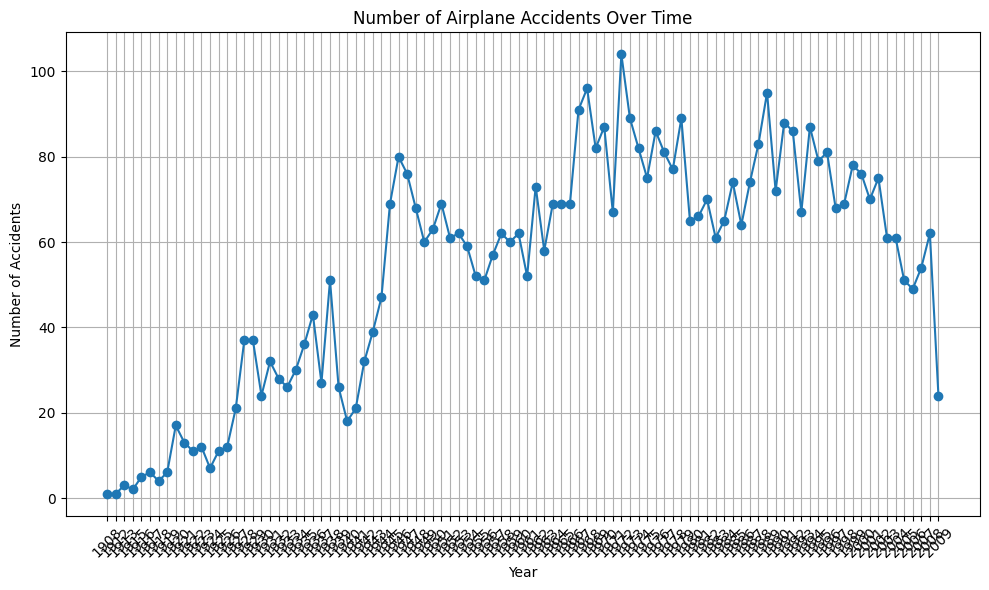

In [9]:
import matplotlib.pyplot as plt
from csv import DictReader
import numpy as np
from datetime import datetime


podatki = []
dtype = [
    ('Date', 'U10'),
    ('Time', 'U10'),
    ('Location', 'U100'),
    ('Operator', 'U100'),
    ('Flight', 'U100'),
    ('Route', 'U100'),
    ('Type', 'U100'),
    ('Registration', 'U100'),
    ('cn_In', 'U100'),
    ('Aboard', np.int32),
    ('Fatalities', np.int32),
    ('Ground', np.int32),
    ('Summary', 'U1000')
]

with open("podatki\Airplane_Crashes_and_Fatalities_Since_1908.csv", 'r', encoding='utf-8') as file:
    csv_reader = DictReader(file)
    for row in csv_reader:
        date_str = row['Date']
        date_obj = datetime.strptime(date_str, '%m/%d/%Y')
        date_fixed = date_obj.strftime('%Y-%m-%d')
        
        time = row['Time']
        location = row['Location']
        operator = row['Operator']
        flightNr = row['Flight #']
        route = row['Route']
        type = row['Type']
        registration = row['Registration']
        CnIn = row['cn/In']
        aboard = int(row["Aboard"]) if row["Aboard"] else 0
        fatalities = int(row["Fatalities"]) if row["Fatalities"] else 0
        ground = int(row['Ground']) if row["Ground"] else 0
        summary = row['Summary']
        podatki.append((date_fixed, time, location, operator, flightNr, route, type, registration, CnIn, aboard, fatalities, ground, summary))

podatki = np.sort(np.array(podatki, dtype=dtype), order='Date')

years = np.unique([entry['Date'][:4] for entry in podatki])
num_accidents = [np.sum([1 for entry in podatki if entry['Date'].startswith(year)]) for year in years]

plt.figure(figsize=(10, 6))
plt.plot(years, num_accidents, marker='o', linestyle='-')
plt.title('Number of Airplane Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
